In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()
from os import mkdir
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json 
! kaggle datasets list
! kaggle datasets download -d ajisofyan/survey-lung-cancer
! unzip survey-lung-cancer.zip

Saving kaggle.json to kaggle.json
ref                                                         title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
prasertk/netflix-subscription-price-in-different-countries  Netflix subscription fee in different countries    3KB  2022-01-15 07:06:09           3414  
nkitgupta/jigsaw-regression-based-data                      Jigsaw Regression Based Data                       3GB  2022-02-05 20:51:56            901  
yasserh/wine-quality-dataset                                Wine Quality Dataset                              21KB  2022-01-15 19:15:11           3480  
majyhain/height-of-male-and-female-by-country-2022          Height of Male and Female by Country 2022          4KB  2022-02-02 00:40:19           1133  
sanjeetsinghnaik/top-1000-highest-grossing-movie

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# Loading DataSet

In [ ]:
df = pd.read_csv("/content/survey_lung_cancer.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,FEMALE,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES
305,MALE,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
306,MALE,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES
307,MALE,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES


# Exploratory Data Analysis

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [ ]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,FEMALE,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES
305,MALE,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
306,MALE,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES
307,MALE,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES
308,MALE,62,0,0,0,1,0,1,1,1,1,0,0,1,0,YES


In [ ]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [ ]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
df.shape

(309, 16)

In [ ]:
df.size

4944

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


AGE                     -0.395086
SMOKING                 -0.255705
YELLOW_FINGERS          -0.282425
ANXIETY                  0.006504
PEER_PRESSURE           -0.006504
CHRONIC DISEASE         -0.019513
FATIGUE                 -0.741836
ALLERGY                 -0.229118
WHEEZING                -0.229118
ALCOHOL CONSUMING       -0.229118
COUGHING                -0.322786
SHORTNESS OF BREATH     -0.589714
SWALLOWING DIFFICULTY    0.123812
CHEST PAIN              -0.229118
dtype: float64

In [ ]:
df.corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
CHRONIC DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640
ALCOHOL CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226


# Data visualization

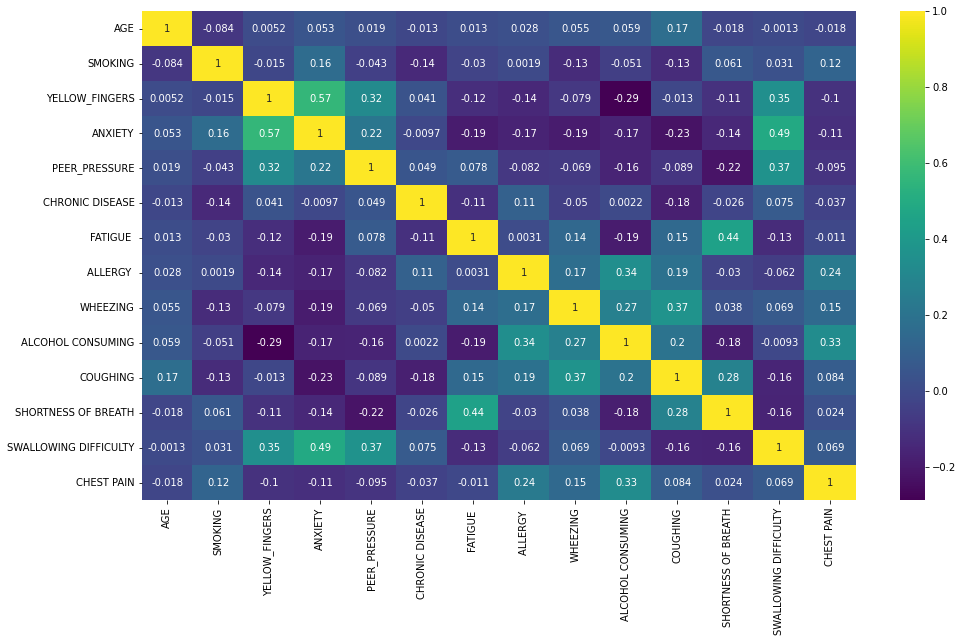

In [ ]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(df.corr(),annot = True,cmap = 'viridis')
plt.show()

In [ ]:
df['GENDER'].value_counts()
# balanced column

MALE      162
FEMALE    147
Name: GENDER, dtype: int64

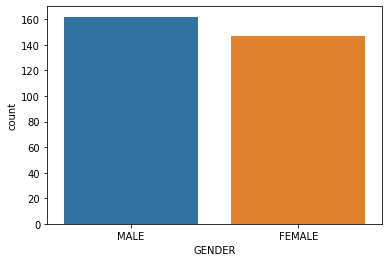

In [ ]:
sns.countplot(x = 'GENDER',data = df)
plt.show()

In [ ]:
df['SMOKING'].value_counts()
# balanced column
# number of smoking persons > number of non smoking persons

1    174
0    135
Name: SMOKING, dtype: int64

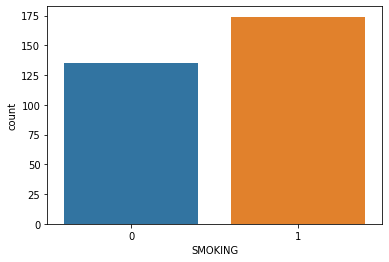

In [ ]:
sns.countplot(x = 'SMOKING',data = df)
plt.show()

In [ ]:
df['YELLOW_FINGERS'].value_counts()
# balanced column
# people with yellow fingers > people with not yellow fingers

1    176
0    133
Name: YELLOW_FINGERS, dtype: int64

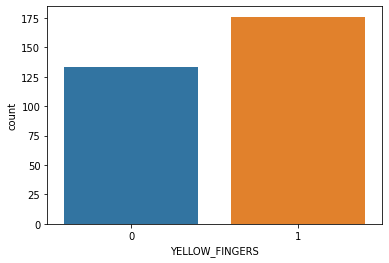

In [ ]:
sns.countplot(x = 'YELLOW_FINGERS', data = df)
plt.show()

In [ ]:
df['ANXIETY'].value_counts()
# alomost equal with favouring anxiety = TRUE only one person difference 

0    155
1    154
Name: ANXIETY, dtype: int64

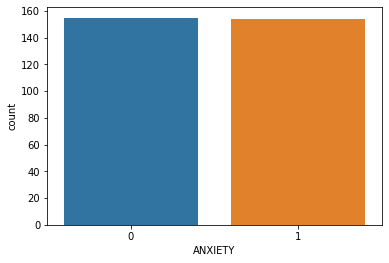

In [ ]:
sns.countplot(x = 'ANXIETY', data = df)
plt.show()

In [ ]:
df['PEER_PRESSURE'].value_counts()
# alomost equal with favouring peer pressure = TRUE only one person difference 

1    155
0    154
Name: PEER_PRESSURE, dtype: int64

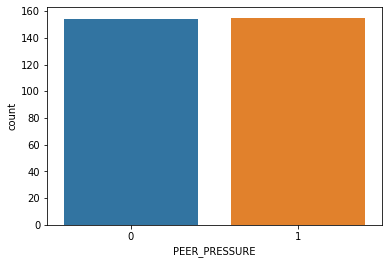

In [ ]:
sns.countplot(x = 'PEER_PRESSURE',data = df)
plt.show()

In [ ]:
df['CHRONIC DISEASE'].value_counts()
# alomost equal with favouring peer pressure = TRUE only one person difference 

1    156
0    153
Name: CHRONIC DISEASE, dtype: int64

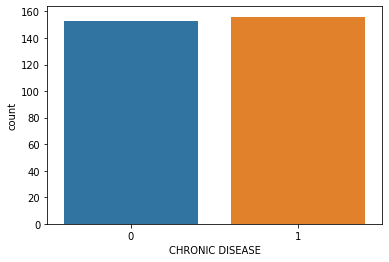

In [ ]:
sns.countplot(x = 'CHRONIC DISEASE',data = df)
plt.show()

In [ ]:
df['FATIGUE '].value_counts()
# people with Fatigue are more

1    208
0    101
Name: FATIGUE , dtype: int64

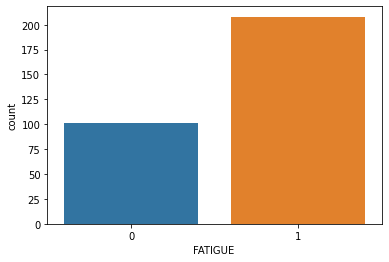

In [ ]:
sns.countplot(x ='FATIGUE ',data = df)
plt.show()

In [ ]:
df['ALLERGY '].value_counts()
# people with allergy are more

1    172
0    137
Name: ALLERGY , dtype: int64

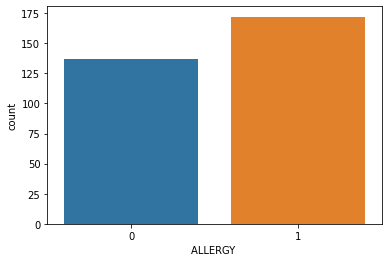

In [ ]:
sns.countplot(x = 'ALLERGY ',data = df)
plt.show()

In [ ]:
df['WHEEZING'].value_counts()
# people with wheezing are more

1    172
0    137
Name: WHEEZING, dtype: int64

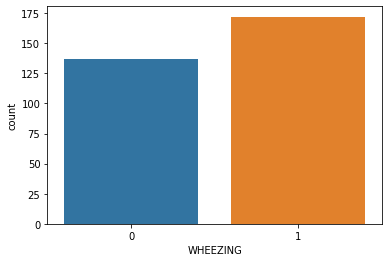

In [ ]:
sns.countplot(x = 'WHEEZING',data = df)
plt.show()

In [ ]:
df['ALCOHOL CONSUMING'].value_counts()
# people with alocohol consuming are more

1    172
0    137
Name: ALCOHOL CONSUMING, dtype: int64

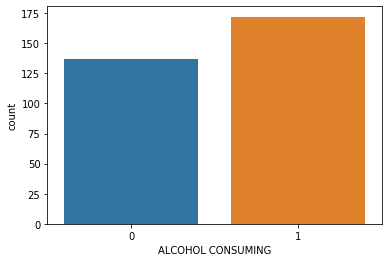

In [ ]:
sns.countplot(x = 'ALCOHOL CONSUMING',data = df)
plt.show()

In [ ]:
df['COUGHING'].value_counts()
# people with cough are more

1    179
0    130
Name: COUGHING, dtype: int64

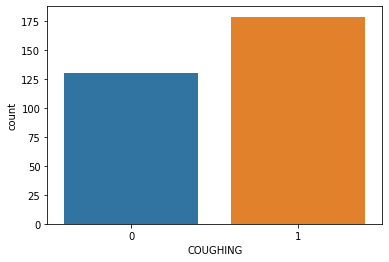

In [ ]:
sns.countplot(x = 'COUGHING',data = df)
plt.show()

In [ ]:
df['SHORTNESS OF BREATH'].value_counts()
# people with shoetness of breath are more

1    198
0    111
Name: SHORTNESS OF BREATH, dtype: int64

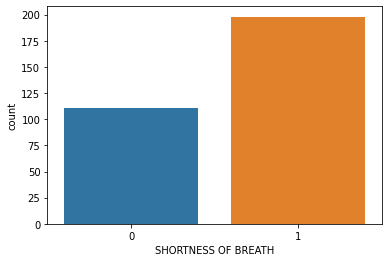

In [ ]:
sns.countplot(x = 'SHORTNESS OF BREATH',data = df)
plt.show()

In [ ]:
df['SWALLOWING DIFFICULTY'].value_counts()
# people with swallowing difficulty are more

0    164
1    145
Name: SWALLOWING DIFFICULTY, dtype: int64

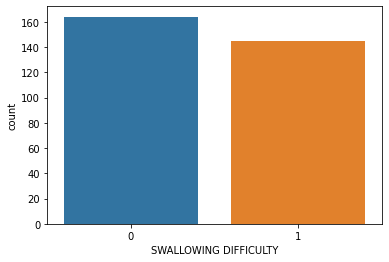

In [ ]:
sns.countplot(x = 'SWALLOWING DIFFICULTY',data = df)
plt.show()

In [ ]:
df['CHEST PAIN'].value_counts()
# people with chest pain are more

1    172
0    137
Name: CHEST PAIN, dtype: int64

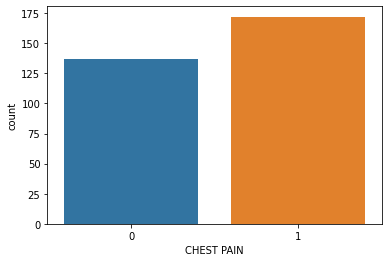

In [ ]:
sns.countplot(x = 'CHEST PAIN',data = df)
plt.show()

In [ ]:
print ('Total Healthy Patients : {} '.format(df.LUNG_CANCER.value_counts()[0]))
print ('Total Suspected Patients : {} '.format(df.LUNG_CANCER.value_counts()[1]))

Total Healthy Patients : 270 
Total Suspected Patients : 39 


In [ ]:
x = df['LUNG_CANCER'].value_counts().index.tolist()
y = df['LUNG_CANCER'].value_counts().tolist()

fig = px.bar(x=x, y=y, color=["firebrick", "green"], color_discrete_map="identity",
             labels={
                'x': 'LUNG_CANCER',
                'y': 'count'
                },)
fig.show()

In [ ]:
values = df['LUNG_CANCER'].value_counts().tolist()
names = list(dict(df['LUNG_CANCER'].value_counts()).keys())

px.pie(df, values=values, names=names, hole = 0.5,
       color_discrete_sequence=["red", "green"])

## analysing age  with other columns

In [ ]:
obj = ['GENDER','SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

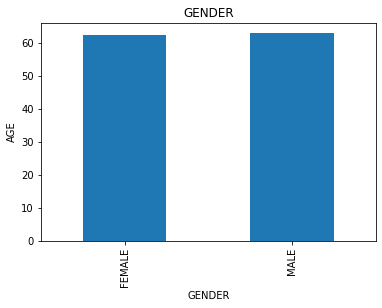

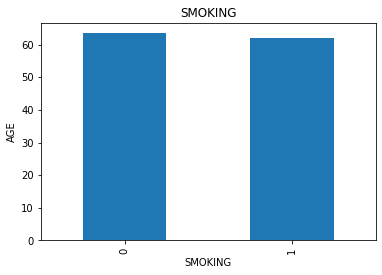

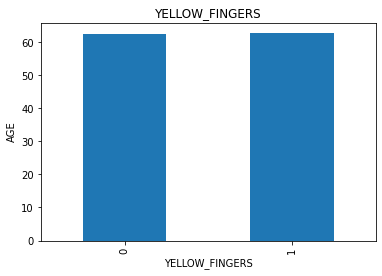

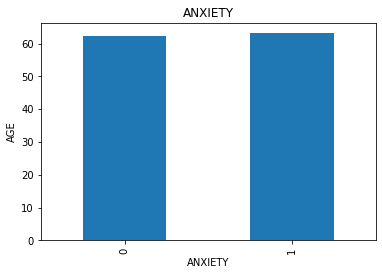

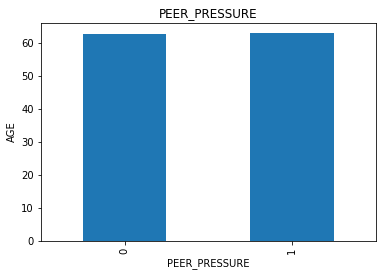

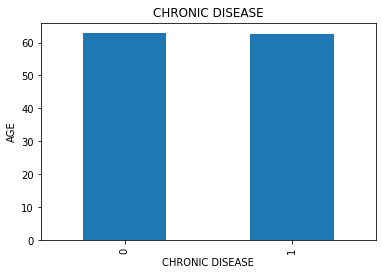

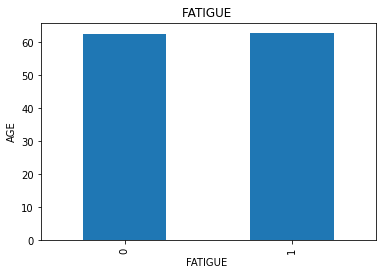

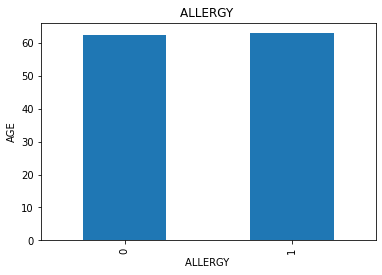

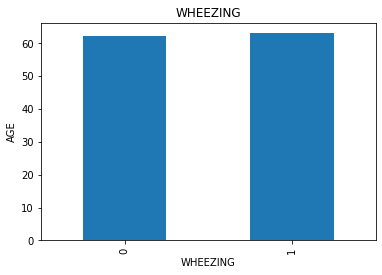

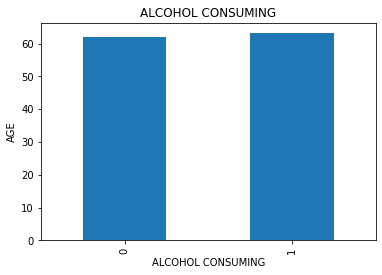

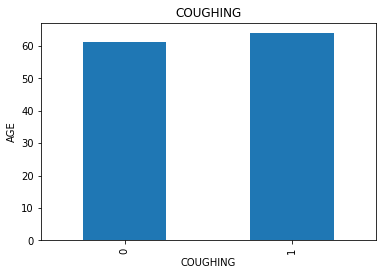

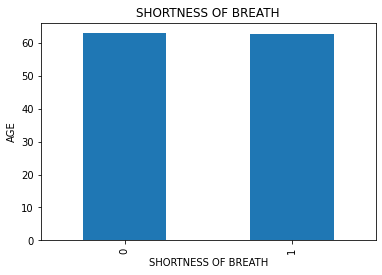

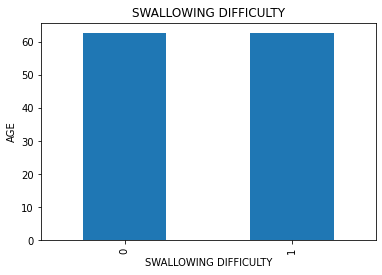

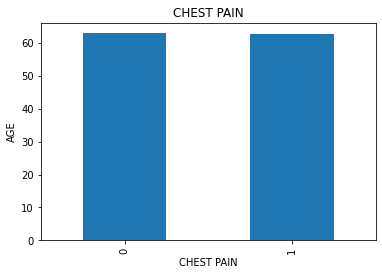

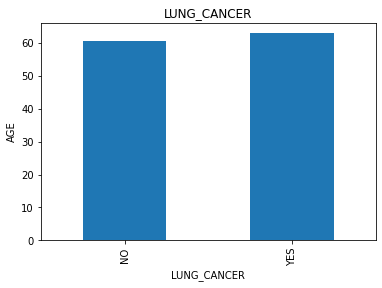

In [ ]:
# Age has no corelation or anything varying with all other columns
for i in obj:
    data=df.copy()
    data.groupby(i)['AGE'].mean().plot.bar()
    plt.xlabel(i)
    plt.ylabel('AGE')
    plt.title(i)
    plt.show()

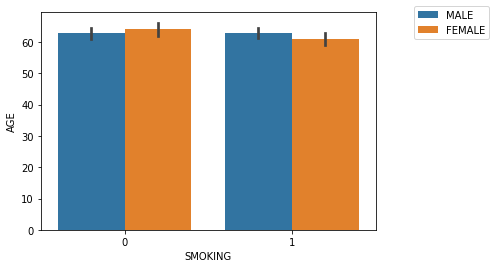

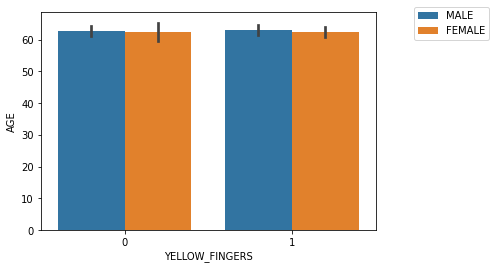

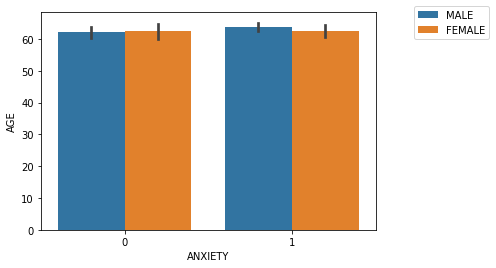

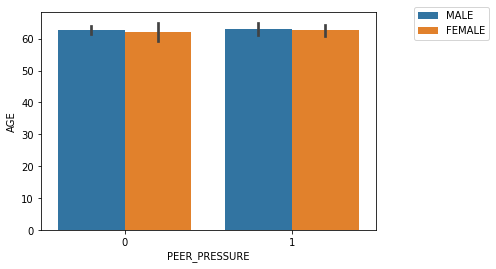

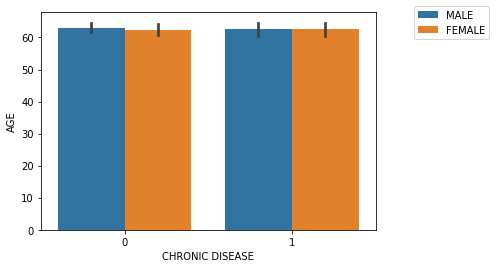

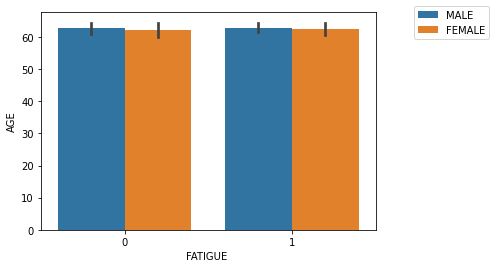

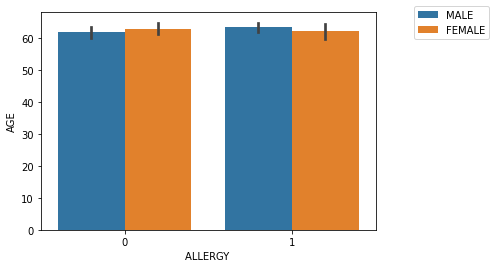

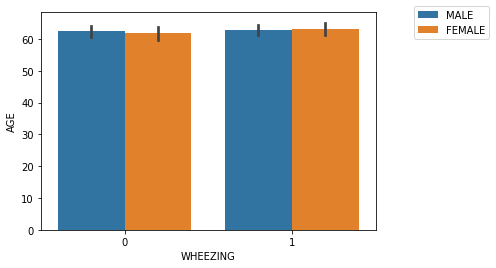

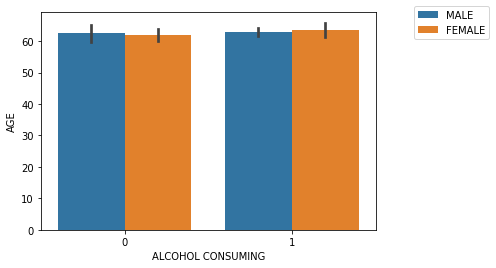

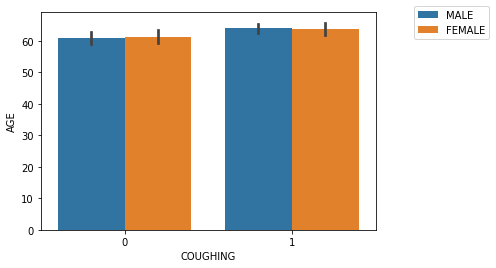

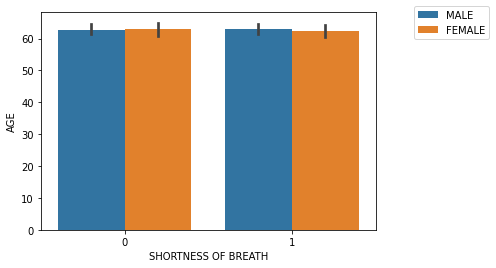

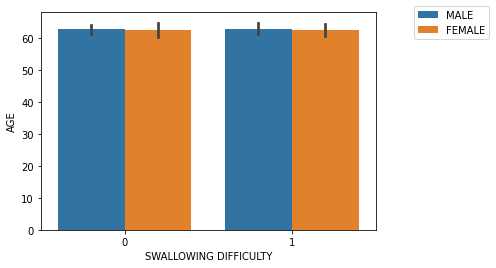

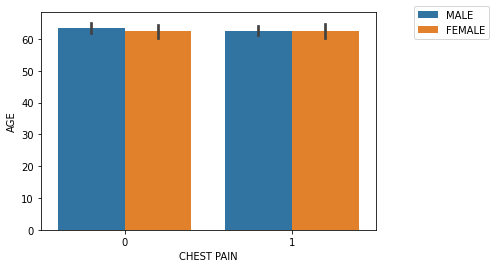

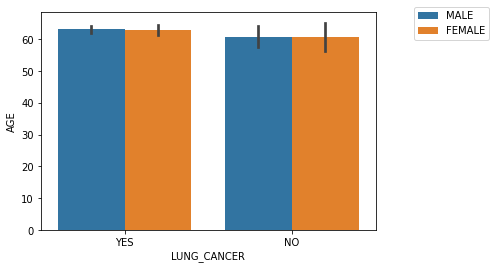

In [ ]:
# I found no relations
for i in range(len(obj)):
    for j in range(1):
        x = obj[i]
        if obj[j] != x:
            sns.barplot(x= x,y='AGE',hue=obj[j],data=df)
            plt.legend(bbox_to_anchor=(1.1, 1.05))
            plt.show()

# Encoding

In [ ]:
df=pd.get_dummies(data=df,columns=['LUNG_CANCER'],drop_first=True)
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER_YES
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,FEMALE,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,MALE,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,MALE,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,MALE,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


# (IMPORTANT)Analysis using groupby

In [ ]:
df1 = df.groupby('AGE').agg({ 'GENDER' : 'count', 'SMOKING' : 'sum', 'YELLOW_FINGERS' : 'sum', 'ANXIETY' : 'sum',
       'PEER_PRESSURE' : 'sum', 'CHRONIC DISEASE' : 'sum', 'FATIGUE ' : 'sum', 'ALLERGY ' : 'sum', 'WHEEZING' : 'sum',
       'ALCOHOL CONSUMING' : 'sum', 'COUGHING' : 'sum', 'SHORTNESS OF BREATH' : 'sum',
       'SWALLOWING DIFFICULTY' : 'sum', 'CHEST PAIN' : 'sum', 'LUNG_CANCER_YES' : 'sum'})
df1

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER_YES
AGE,,,,,,,,,,,,,,,
21,1,1,0,0,0,1,1,1,0,0,0,1,0,0,0
38,1,0,1,0,0,1,1,1,1,0,1,1,0,1,1
39,1,1,0,0,1,0,1,1,1,1,0,1,0,1,1
44,2,1,2,1,2,2,2,0,1,0,0,2,2,1,2
46,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0
47,4,3,4,0,3,4,3,2,3,0,2,3,1,2,3
48,2,1,1,1,1,2,2,2,1,1,2,2,2,1,2
49,3,1,1,1,2,2,1,2,1,2,3,2,1,1,3
51,8,6,7,5,5,3,7,4,3,3,3,7,4,3,8


In [ ]:
df2 = df.groupby('GENDER').agg({ 'AGE' : 'count', 'SMOKING' : 'sum', 'YELLOW_FINGERS' : 'sum', 'ANXIETY' : 'sum',
       'PEER_PRESSURE' : 'sum', 'CHRONIC DISEASE' : 'sum', 'FATIGUE ' : 'sum', 'ALLERGY ' : 'sum', 'WHEEZING' : 'sum',
       'ALCOHOL CONSUMING' : 'sum', 'COUGHING' : 'sum', 'SHORTNESS OF BREATH' : 'sum',
       'SWALLOWING DIFFICULTY' : 'sum', 'CHEST PAIN' : 'sum', 'LUNG_CANCER_YES' : 'sum'})
df2

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER_YES
GENDER,,,,,,,,,,,,,,,
FEMALE,147,80,100,85,95,90,105,70,71,47,75,99,75,54,125
MALE,162,94,76,69,60,66,103,102,101,125,104,99,70,118,145


In [ ]:
px.bar(data_frame=df2, barmode='group',
       title = "<b>Gender wise Analyzing</b>",template="plotly_dark")

In [ ]:
df=pd.get_dummies(data=df,columns=['GENDER'],drop_first=True)
df

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER_YES,GENDER_MALE
0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1,1
1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1,1
2,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0
3,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1
4,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1,0
305,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1,1
306,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1,1
307,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1,1


In [ ]:
df3 = df.groupby('SMOKING').agg({ 'GENDER_MALE' : 'sum','AGE' : 'count', 'SMOKING' : 'sum', 'YELLOW_FINGERS' : 'sum', 'ANXIETY' : 'sum',
       'PEER_PRESSURE' : 'sum', 'CHRONIC DISEASE' : 'sum','FATIGUE ' : 'sum', 'ALLERGY ' : 'sum', 'WHEEZING' : 'sum',
       'ALCOHOL CONSUMING' : 'sum', 'COUGHING' : 'sum', 'SHORTNESS OF BREATH' : 'sum',
       'SWALLOWING DIFFICULTY' : 'sum', 'CHEST PAIN' : 'sum', 'LUNG_CANCER_YES' : 'sum'})
df3
# 1 = NO
# 2 = YES

,GENDER_MALE,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER_YES
SMOKING,,,,,,,,,,,,,,,,
0,68,135,0,78,55,71,79,93,75,85,79,88,82,61,66,115
1,94,174,174,98,99,84,77,115,97,87,93,91,116,84,106,155


## smoking people have high problems and people who smoke got cancer more

In [ ]:
px.bar(data_frame=df3, barmode='group',
       title = "<b>smoking wise Analyzing</b>",template="plotly_dark")

In [ ]:
df4 = df.groupby('YELLOW_FINGERS').agg({ 'GENDER_MALE' : 'sum','AGE' : 'count', 'SMOKING' : 'sum', 'YELLOW_FINGERS' : 'sum', 'ANXIETY' : 'sum',
       'PEER_PRESSURE' : 'sum', 'CHRONIC DISEASE' : 'sum','FATIGUE ' : 'sum', 'ALLERGY ' : 'sum', 'WHEEZING' : 'sum',
       'ALCOHOL CONSUMING' : 'sum', 'COUGHING' : 'sum', 'SHORTNESS OF BREATH' : 'sum',
       'SWALLOWING DIFFICULTY' : 'sum', 'CHEST PAIN' : 'sum', 'LUNG_CANCER_YES' : 'sum'})
df4
# 1 = NO
# 2 = YES

,GENDER_MALE,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER_YES
YELLOW_FINGERS,,,,,,,,,,,,,,,,
0,86,133,76,0,23,42,64,98,85,80,96,78,93,36,82,107
1,76,176,98,176,131,113,92,110,87,92,76,101,105,109,90,163


## mostly females have yellow fingers so any person with yellow fingers have high probability of getting lung cancer

In [ ]:
px.bar(data_frame=df4, barmode='group',
       title = "<b>yelow fingers wise Analyzing</b>",template="plotly_dark")

In [ ]:
df5 = df.groupby('ANXIETY').agg({ 'GENDER_MALE' : 'sum','AGE' : 'count', 'SMOKING' : 'sum', 'YELLOW_FINGERS' : 'sum', 'ANXIETY' : 'sum',
       'PEER_PRESSURE' : 'sum', 'CHRONIC DISEASE' : 'sum','FATIGUE ' : 'sum', 'ALLERGY ' : 'sum', 'WHEEZING' : 'sum',
       'ALCOHOL CONSUMING' : 'sum', 'COUGHING' : 'sum', 'SHORTNESS OF BREATH' : 'sum',
       'SWALLOWING DIFFICULTY' : 'sum', 'CHEST PAIN' : 'sum', 'LUNG_CANCER_YES' : 'sum'})
df5
# 1 = NO
# 2 = YES

,GENDER_MALE,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER_YES
ANXIETY,,,,,,,,,,,,,,,,
0,93,155,75,45,0,61,79,118,99,101,99,107,110,35,95,128
1,69,154,99,131,154,94,77,90,73,71,73,72,88,110,77,142


## mostly males are less anxiety
## people with less anxiety are less smoking, having less yellow_fingers,less peer pressure less swallowing dificulity and less chance to get cancer

In [ ]:
px.bar(data_frame=df5, barmode='group',
       title = "<b>Anxietyr wise Analyzing</b>",template="plotly_dark")

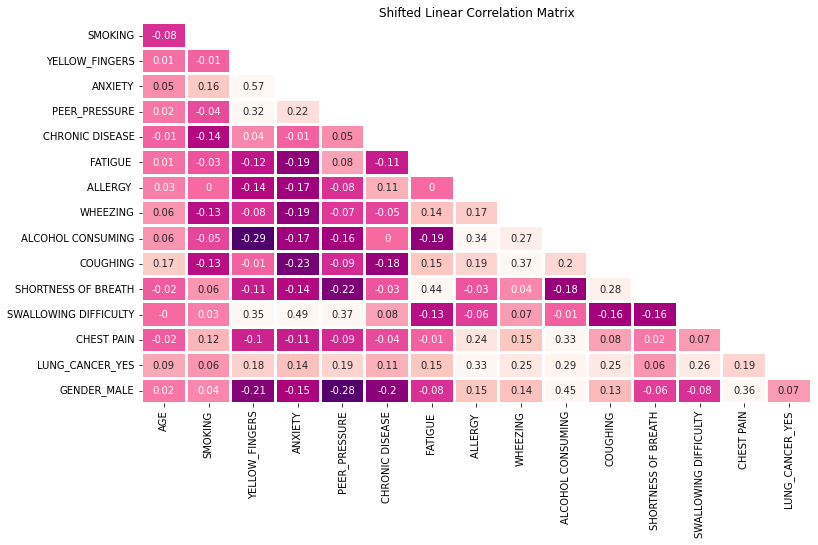

In [ ]:
''' Plot a Shifted Correlation Matrix '''
# Diagonal correlation is always unity & less relevant, shifted variant shows only relevant cases
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(12,7))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim() 
#     ax.set_ylim(bottom + 0.5, top - 0.5) 
    ax.set_title('Shifted Linear Correlation Matrix')
    
corrMat(df)

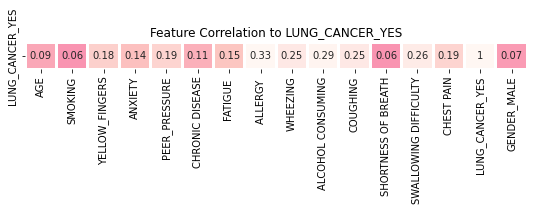

In [ ]:
'''Plot Correlation to Target Variable only'''
def corrMat2(df,target='LUNG_CANCER_YES',figsize=(9,0.5),ret_id=False):
    
    corr_mat = df.corr().round(2);shape = corr_mat.shape[0]
    corr_mat = corr_mat.transpose()
    corr = corr_mat.loc[:, df.columns == target].transpose().copy()
    if(ret_id is False):
        f, ax = plt.subplots(figsize=figsize)
        sns.heatmap(corr,vmin=-0.3,vmax=0.3,center=0, 
                     cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
        plt.title(f'Feature Correlation to {target}')
    
    if(ret_id):
        return corr
corrMat2(df)

In [ ]:
df

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER_YES,GENDER_MALE
0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1,1
1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1,1
2,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0
3,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1
4,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1,0
305,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1,1
306,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1,1
307,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1,1


# <span style="color:#32936f;"> Splitting the data into training and test datasets </span>
Here, we are trying to predict whether the patient has Lung Cancer or not using the given data. Hence, `LUNG_CANCER` will be the y label and rest of the data will be the X or the input data.

In [ ]:
# X data
X = df.drop("LUNG_CANCER_YES", axis=1)
X.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_MALE
0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,63,1,1,1,0,0,0,0,0,1,0,0,1,1,1
4,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [ ]:
# y data
y = df["LUNG_CANCER_YES"]
y.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER_YES, dtype: uint8

In [ ]:
# Adding randomized samples to the data as the data is imbalanced

from imblearn.over_sampling import RandomOverSampler

over_samp =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = over_samp.fit_resample(X, y)
X_train_res.shape, y_train_res.shape

((540, 15), (540,))

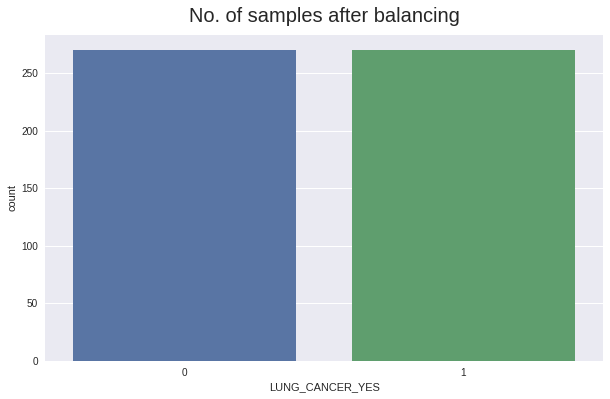

In [ ]:
plt.style.use("seaborn")
plt.figure(figsize=(10,6))
plt.title("No. of samples after balancing", fontsize=20, y=1.02)
sns.countplot(x = y_train_res)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.2, random_state = 42)

In [ ]:
len(X_train), len(X_test)

(432, 108)

In [ ]:
# Scaling the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

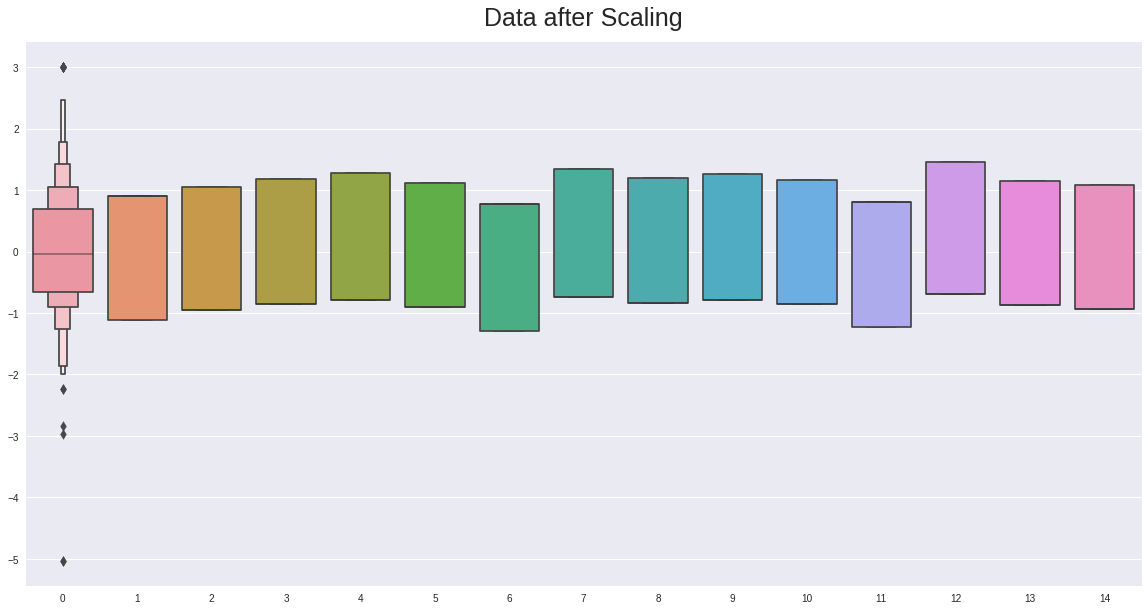

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Data after Scaling", fontsize=25, y=1.02)
sns.boxenplot(data = X_train)
plt.show()

# Prediction of lung cancer using logistic regression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
pred = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        51
           1       1.00      0.84      0.91        57

    accuracy                           0.92       108
   macro avg       0.93      0.92      0.92       108
weighted avg       0.93      0.92      0.92       108

[[51  0]
 [ 9 48]]


In [ ]:
logistic_acc= logmodel.score(X_test,y_test)
print(logistic_acc)

0.9166666666666666


# Prediction of lung cancer using randomforest

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 99.07407407407408


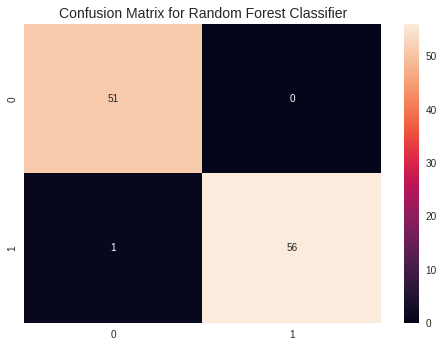

In [ ]:
# Confusion Matrix of Random Forest Classifier
from sklearn.metrics import confusion_matrix, classification_report

y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, y=1.03);

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.98      0.99        57

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108



In [ ]:
from sklearn.svm import SVC

svc_model = SVC(kernel="rbf")
svc_model.fit(X_train, y_train)
predictions5 = svc_model.predict(X_test)

In [ ]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions5))
print("\n")
print(classification_report(y_test, predictions5))

Confusion Matrix: 
 [[51  0]
 [ 5 52]]


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        51
           1       1.00      0.91      0.95        57

    accuracy                           0.95       108
   macro avg       0.96      0.96      0.95       108
weighted avg       0.96      0.95      0.95       108



In [ ]:
svm_acc = accuracy_score(y_test, predictions5)
print("Accuracy of SVM model is: ", svm_acc)

Accuracy of SVM model is:  0.9537037037037037


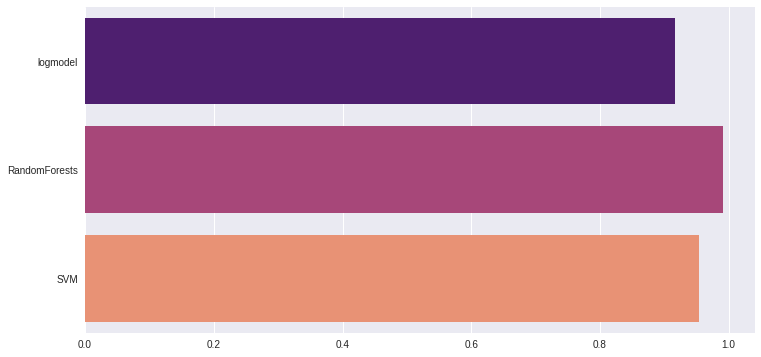

In [ ]:
plt.figure(figsize=(12,6))
model_acc = [logistic_acc, RandomForestClassifierScore, svm_acc]
model_name = ['logmodel', 'RandomForests', 'SVM']
sns.barplot(x= model_acc, y=model_name, palette='magma')